# sklearn_classification_models_for_seasonal_selections

https://www.projectpro.io/article/multi-class-classification-python-example/547#mcetoc_1fpjsn4g8g

https://www.educba.com/keras-sequential/

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
#from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [44]:
def metrics(x, y):
    
    from sklearn import metrics
    try:
        ev = metrics.explained_variance_score(x, y)
    except:
        ev = np.nan
    print("Ev score: ", ev)
    
    try:
        me = metrics.max_error(x, y)
    except:
        me = np.nan
    print("Maximum Error: ", me)
    
    try:
        mae = metrics.mean_absolute_error(x, y)
    except:
        mae = np.nan
    print("Mean Absolute Error: ", mae)
    
    try:
        mse = metrics.mean_squared_error(x, y)
    except:
        mse = np.nan
    print("Mean Squared Error: ", mse)
    
    try:
        rmse = metrics.mean_squared_error(x, y, squared=False)
    except:
        rmse =  np.nan
    print("Root Mean Squared Error: ", rmse)
    
    try:
        msle = metrics.mean_squared_log_error(x, y)
    except:
        msle = np.nan
    print("Mean Squared Log Error: ", msle)
   
    try:
        rmsle = metrics.mean_squared_log_error(x, y, squared = False)
    except:
        rmsle =  np.nan
    print("Root Mean Squared Log Error : ", rmsle)
    
    try:
        mape = metrics.mean_absolute_percentage_error(x, y)
    except:
        mape = np.nan
    print("Mean Absolute Percentage Error: ", mape)
    
    try:
        medae = metrics.median_absolute_error(x, y)
    except:
        medae = np.nan
    print("Median Absolute Error: ", medae)
    
    try:
        r2 = metrics.r2_score(x, y)
    except:
        r2 = np.nan
    print("Coefficient of determination: ", r2)
    
    try:
        bias = bias = np.mean(x) - np.mean(y)
    except:
        bias = np.nan
    print("Bias: ", bias)
    
    n = len(x)
    print("n: ", n)
    
    return ev, me, mae, mse, rmse, msle, rmsle, mape, medae, r2, bias, n

In [45]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230225
20230225_081811


### Import data

In [46]:
#date_str = "20230201"
drive = "D"
data_date = "20230205"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

# model csv outputs
output_ml_csv = r"{0}:\cdu\data\ml_outputs".format(drive)

index_ = 1


In [47]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    print("pathway ", dir_)
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

## Load data

In [48]:
file_list = []
for f in glob(os.path.join(dir_, "*reg.csv")):
    print(f)
    file_list.append(f)


D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std__fnm_fms_si_reg.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std__fnm_fms_si_reg.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std_met_fnm_fms_si_reg.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std_met_fnm_fms_si_reg.csv


In [49]:
_, file_name = os.path.split(file_list[index_])
split_list = file_name.split(".")
data_set = split_list[0]

In [50]:
data_set

'r2_bs_mean_max_min_med_std__fnm_fms_si_reg'

In [51]:
# ml_reg_dir= os.path.join(output_dir, "ml_reg_dir")
# data_set_dir= os.path.join(ml_reg_dir, "data_set")
# export_ml_reg_dir = os.path.join(data_set_dir, date_time_str)
# # plots_dir = os.path.join(export_ml_rf_reg_dir, data_set)
# all_plots_dir = os.path.join(export_ml_reg_dir, "all_plots")
# # no_tern_plots_dir = os.path.join(plots_dir, "no_tern")


In [52]:
ml_reg_dir= os.path.join(output_dir, "ml_reg_dir")
plots_dir = os.path.join(ml_reg_dir, "ml_reg_plots_dir")
all_plots_dir = os.path.join(plots_dir, "all")
no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
mk_dir_fn(output_dir)
mk_dir_fn(ml_reg_dir)
mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
mk_dir_fn(no_tern_plots_dir)

pathway  D:\cdu\data\zonal_stats\output\20230225
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir\ml_reg_plots_dir
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir\ml_reg_plots_dir\all
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir\ml_reg_plots_dir\no_tern


In [53]:
# mk_dir_fn(output_dir)
# mk_dir_fn(ml_rf_reg_dir)
# mk_dir_fn(data_set_dir)
# mk_dir_fn(export_ml_rf_reg_dir)
# # mk_dir_fn(plots_dir)
# mk_dir_fn(all_plots_dir)
# # mk_dir_fn(no_tern_plots_dir)

In [54]:
df = pd.read_csv(file_list[index_], header=0)

In [55]:
df

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,ntadac0002,79,20160506,15.54,42.39,29.12,29.27,6.84,16.05,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,ntaarp0001,75,20160602,27.61,38.92,34.75,34.33,3.24,17.31,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,ntaarp0002,76,20160602,9.06,22.31,14.40,14.21,3.60,9.74,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,ntaarp0003,77,20160603,5.26,25.45,13.08,12.11,5.79,9.61,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


slope:  398.39405526585966
intersept:  -1545.2575127961409
r2:  0.6680461286822867
P_value:  6.104388470146404e-23
std error:  34.54675999706051


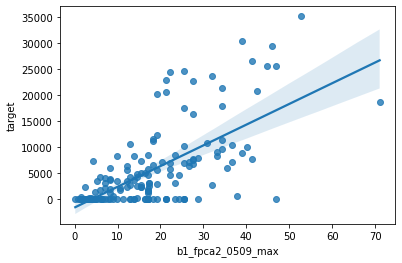

In [56]:
value_y = 'target'
value_x = 'b1_fpca2_0509_max'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [154]:
df_ml = df.copy(deep=True)
df_ml.shape

(167, 174)

In [155]:
df_ml_cor = df_ml.corr().unstack().sort_values().drop_duplicates()
df_corr_ = pd.DataFrame(df_ml_cor)


In [156]:
df_corr_.reset_index(drop= False, inplace=True)

In [157]:
df_corr_.columns =["feature1", "feature2", "corrolation"]

In [159]:
tar_corr = df_corr_[df_corr_["feature1"]=="target"]
tar_corr.sort_values(by=["corrolation"], ascending=False)

,feature1,feature2,corrolation
14878,target,target,1.00
13476,target,b1_dja_0305_max,0.70
13414,target,b1_dja_0305_mean,0.69
13407,target,b1_fpca2_0509_mean,0.69
13394,target,b1_dja_0305_med,0.69
...,...,...,...
1035,target,b3_dbi_0608_mean,-0.61
1008,target,b3_dbi_0608_med,-0.62
964,target,b6_dbi_0608_med,-0.62
923,target,b5_dbi_0608_mean,-0.63


In [160]:
out_file = os.path.join(ml_reg_dir, "target_corrolation.csv")
tar_corr.to_csv(out_file, index=False)
print(out_file)

D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir\target_corrolation.csv


In [121]:
df_ml

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,ntadac0002,79,20160506,15.54,42.39,29.12,29.27,6.84,16.05,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,ntaarp0001,75,20160602,27.61,38.92,34.75,34.33,3.24,17.31,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,ntaarp0002,76,20160602,9.06,22.31,14.40,14.21,3.60,9.74,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,ntaarp0003,77,20160603,5.26,25.45,13.08,12.11,5.79,9.61,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


### Set variables to plot

## Choose which data set to run the models from

In [58]:
df_ml.head(5)

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007


In [59]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [60]:
df_ml

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,13.78,47.00,25.85,23.87,8.48,7.27,11.78,9.24,8.86,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,0.75,2.87,1.69,1.49,0.70,4.38,8.97,6.83,7.18,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,2.12,6.42,4.37,4.47,1.22,5.93,8.85,7.68,7.68,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,0.75,3.29,1.82,1.64,0.70,3.66,7.09,4.98,4.85,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,2.12,13.78,4.97,4.73,2.43,3.13,5.82,4.55,4.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Qty of 0 values dataset 

In [61]:
model_data_ = df_ml
model_data_name = "all_values"


model_data_ = df_ml[df_ml['target']>0.0]
model_data_name = "no0_values"


# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(ml_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)
print(model_data_.shape)

# define model output name for all outputs
#str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_m_feat_{m_feat}_m_depth_{maxd}_{date_time_str}"

pathway  D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir\no0_values
D:\cdu\data\zonal_stats\output\20230225\ml_reg_dir\no0_values
(110, 171)


In [62]:
# model_data_ = df_ml
# model_data_name = "all_values"

# # ## Filter out all taregt == 0 values
# model_data = df_ml[df_ml['target']>0]
# model_data_name = "no0_values"

# # # ## Filter out all taregt == 0 values
# # model_data = df_ml[(df_ml['target']>0) & (df_ml['target']!=9)]
# # model_data_name = "no0or9_values"


# # ## Select a randon number of 0 values
# # n = 3
# # agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# # model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# # model_data_name = f"s{n}_0_values"


# model_outputs = os.path.join(ml_reg_dir, f"{model_data_name}")
# mk_dir_fn(model_outputs)

# print(model_outputs)
# print(model_data_.shape)

# # print(model_outputs)

In [63]:
#model_data.target.value_counts()

In [64]:
model_data_.dropna(inplace=True)
print(model_data_.shape)

(110, 171)


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Select the dataset to run the models from

Define if you are using all variabes or selected variables

In [65]:
model_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
5,1894.20,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
8,1536.15,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,1164.24,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,4736.01,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
12,1549.09,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,16375.18,19.30,27.61,23.58,23.34,2.53,15.64,19.64,18.24,18.35,...,-1222031,1222031,3647779,881563,1718000,2675640,1576000,3000000,5472222,8485610
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
165,17598.35,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


### Split off unseen data

In [66]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = model_data_.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = model_data_.drop(unseen_data.index)

In [67]:
unseen_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
159,6922.04,2.12,22.31,10.57,7.68,5.32,6.20,18.01,11.41,10.78,...,-2008766,2008766,2254215,-131606,1815000,2524744,1540000,2822581,4836683,6951340
49,7203.20,14.65,20.29,16.37,15.54,1.69,9.25,14.04,11.53,12.00,...,-1346154,1346154,2222586,-611013,1417000,2217732,1277000,2568727,5197395,7788780
129,2439.36,0.97,2.48,1.66,1.49,0.45,0.95,7.29,4.02,4.13,...,-1962121,1962121,1941265,-478650,1704000,1717255,1186000,1903896,2730203,3232945
145,5778.08,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2144638,2144638,817031,-1128728,1405000,1329826,889000,1513449,2332721,2682615
100,129.36,0.57,2.87,1.17,0.97,0.63,3.28,5.57,4.18,4.06,...,-1991361,1991361,1832298,-596462,1359000,1359298,898000,1552917,2444203,2833449
128,3603.60,0.97,5.26,3.23,3.52,1.25,5.31,6.66,6.00,6.01,...,-1241722,1241722,793720,-1136974,1417000,1684005,1117000,1896864,2914166,3500123
40,7658.54,2.48,27.61,10.33,9.06,6.57,12.56,16.83,14.28,14.09,...,-1754917,1754917,445050,-767996,1180000,1600000,948000,1895495,3788969,4899924
97,295.68,0.75,3.74,1.90,1.79,0.93,3.19,5.17,4.19,4.15,...,-2123987,2123987,1792230,-606941,1629000,1462415,1026000,1625475,2296329,2633942
39,8031.45,12.93,28.71,19.42,19.79,4.33,10.19,16.27,14.23,14.49,...,-1986971,1986971,1175911,-637281,1271000,1743222,1027000,2054274,4109644,5477017
154,4327.62,6.42,14.65,9.83,9.42,1.99,8.46,12.20,10.52,10.69,...,-1803279,1803279,2207727,-611615,1708000,2191866,1389000,2457827,3994823,5265843


In [68]:
# from sklean.model
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[["target"]].astype('int')
ydata2 = ydata1.values
ydata = ydata2.ravel()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70) #, stratify=ydata)  
         
#y_test.value_counts()
# print(X_test.shape, y_test.shape)

### Plot up Histograms of Lidar meanCHM for train and test datasets

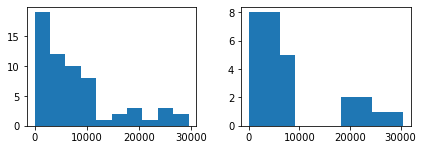

In [69]:
plt.subplot(2, 2, 1)
plt.hist(y_train)
plt.subplot(2, 2, 2)
plt.hist(y_test)
plt.tight_layout()

In [70]:
# def train_model_plot(X_train, y_train, model, str_model, x_limit, y_limit, x_off, y_off):
    
#     print("="*50)
#     print(str_model)
#     print("Train model")
#     print("="*50)

#     # fit model with training data
#     model.fit(X_train, y_train)
    
#     train_ev, train_me, train_mae, train_mse, train_rmse, train_msle, train_rmsle, train_mape, train_medae, train_r2, \
#     train_bias, train_n = metrics(y_1, train_predict)

#     r2 = round(model.score(X_train, y_train), 2)
#     mse = round(np.mean((y_train - model.predict(X_train))**2), 2)

   
#     print(f"R2: {r2}")
#     print(f"MSE: {mse}")
#     #print('intercept:', model.intercept_)
#     #print('slope:', model.coef_) 


#     # plotting the training datat
#     plt.title(f"Model: {str_model.replace('_', ' ')} - Data: training")
#     plt.scatter(model.predict(X_train), y_train)  
#     x = [x_limit,y_limit]
#     y = [x_limit, y_limit]

#     #sets the limits of the axis
#     plt.xlim(x_limit, y_limit)
#     plt.ylim(x_limit, y_limit)

#     plt.ylabel('Observed target')
#     plt.xlabel('Predicted target')
    


#     # 1 for 1 line
#     #adding text inside the plot
#     plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
# #     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {120}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$n = {len(y_train)}$', fontsize = 12)


#     plt.plot(x, y, color = 'r')

#     plot_out = os.path.join(model_outputs, f'{str_model}_train_plot.jpg')
#     plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
#     print(f"plot saved to: {plot_out}")
#     plt.show()
    
    
#     # ------------------------------------ Predict Test ----------------------------------
#     print("="*50)
#     print(str_model)
#     print("Test model")
#     print("="*50)

    
#     # call the model
#     y_test_predict = model.predict(X_test)


#     r2 = model.score(X_test, y_test)
#     mse = np.mean((y_test - model.predict(X_test))** 2)
#     rmse = np.sqrt(np.mean((y_test_predict - y_test) ** 2))
#     bias = np.mean(y_test) - np.mean(y_test_predict)
#     print('Predicted data r2 =', r2)
#     print('MSE =', mse)
# #     print(f"Intercept: {model.intercept_}")
#     #print(f"Slope: {model.coef_}")
# #     print('RMSE =', format(rmse, '.3f'))
# #     print('bias =' , format(bias, '.3f'))
# #     print('n =' , len(y_test))


#     # r2 = round(rfrLCHM.score(X_1, y_1), 2)
#     # mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
#     # rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
#     # bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

#     # plotting the training datat
#     plt.title(f"Model: {str_model.replace('_', ' ')} - Data: testing")
    
#     plt.scatter(y_test_predict, y_test) #, s=10, c='b', marker='o')
#     # data for the 1 for 1 line
#     x = [x_limit,y_limit]
#     y = [x_limit, y_limit]

#     #sets the limits of the axis
#     plt.xlim(x_limit, y_limit)
#     plt.ylim(x_limit, y_limit)
#     plt.ylabel('Observed')
#     plt.xlabel('Predicted')
#     # 1 for 1 line

#     #adding text inside the plot
#     plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(rmse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(bias, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {len(y_test)}$', fontsize = 12)

#     plt.plot(x, y, color = 'r')
#     plot_out = os.path.join(model_outputs, f'{str_model}_test_plot.jpg')
#     plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
#     print(f"plot saved to: {plot_out}")
#     plt.show()    
    
    
#     return str_model, model

In [117]:
def train_model_plot(X_train, y_train, model, str_model, x_limit, y_limit, x_off, y_off):
    
#     feature_importance = model.feature_importances_
#     fi = enumerate(model.feature_importances_)
#     cols = xdata1.columns
#     fiResult = [(value,cols[i]) for (i,value) in fi]
    
    print("="*50)
    print(str_model)
    print("Train model")
    print("="*50)

    # fit model with training data
    model.fit(X_train, y_train)
    
    train_predict = model.predict(X_train)
    
    
    train_ev, train_me, train_mae, train_mse, train_rmse, train_msle, train_rmsle, train_mape, train_medae, train_r2, \
    train_bias, train_n = metrics(y_train, train_predict)

#     r2 = round(model.score(X_train, y_train), 2)
#     mse = round(np.mean((y_train - model.predict(X_train))**2), 2)
#     from sklearn import metrics
#     mse_ = metrics.mean_absolute_error(y_train, train_predict)

   
#     print(f"R2: {r2}")
#     print(f"MSE: {mse}")
#     #print('intercept:', model.intercept_)
#     #print('slope:', model.coef_) 


    # plotting the training datat
    plt.title(f"TRAINING - {str_model.replace('_', ' ')} - Observed vrs. Pridicted AGB")
    plt.scatter(model.predict(X_train), y_train)  
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)

    plt.ylabel('Observed AGB')
    plt.xlabel('Predicted AGB')
    
#     plt.text(300, 37000, f'$R^2 = {round(train_r2, 2)}$', fontsize = 12)
#     plt.text(300, 35000, f'$MSE = {round(train_mse, 2)}$', fontsize = 12)
#     plt.text(300, 33000, f'$RMSE = {round(train_rmse, 2)}$', fontsize = 12)
#     plt.text(300, 31000, f'$Bias = {round(train_bias, 2)}$', fontsize = 12)
#     plt.text(300, 29000, f'$n = {train_n}$', fontsize = 12)


    

    # 1 for 1 line
    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(train_r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(train_mse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(train_rmse, 2)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(train_bias, 2)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {train_n}$', fontsize = 12)


    plt.plot(x, y, color = 'r')

    plot_out = os.path.join(model_outputs, f'{str_model}_training_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()
    
    
    # ------------------------------------ Predict Test ----------------------------------
    print("="*50)
    print(str_model)
    print("Test model")
    print("="*50)

    
    # call the model
    test_predict = model.predict(X_test)

    test_ev, test_me, test_mae, test_mse, test_rmse, test_msle, test_rmsle, test_mape, \
    test_medae, test_r2, test_bias, test_n = metrics(y_test, test_predict)
#     r2 = model.score(X_test, y_test)
#     mse = np.mean((y_test - model.predict(X_test))** 2)
#     rmse = np.sqrt(np.mean((y_test_predict - y_test) ** 2))
#     bias = np.mean(y_test) - np.mean(y_test_predict)
#     print('Predicted data r2 =', r2)
#     print('MSE =', mse)
# #     print(f"Intercept: {model.intercept_}")
#     #print(f"Slope: {model.coef_}")
# #     print('RMSE =', format(rmse, '.3f'))
# #     print('bias =' , format(bias, '.3f'))
# #     print('n =' , len(y_test))


#     # r2 = round(rfrLCHM.score(X_1, y_1), 2)
#     # mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
#     # rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
#     # bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

    # plotting the training datat
    plt.title(f"TESTING {str_model.replace('_', ' ')} - Observed vrs. Pridicted AGB")
    
    plt.scatter(test_predict, y_test) #, s=10, c='b', marker='o')
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    # 1 for 1 line

    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(test_r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(test_mse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(test_rmse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(test_bias, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {test_n}$', fontsize = 12)

    plt.plot(x, y, color = 'r')
    plot_out = os.path.join(model_outputs, f'{str_model}_test_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()    
    
    
    return str_model, model, fiResult

In [118]:
str_model, model, fiResult = train_model_plot(X_train, y_train, LinearRegression(),
                                    "Linear_regression", 0, 40000, 1000, 3000)

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [ ]:
str_model, model = train_model_plot(X_train, y_train, KernelRidge(),
                                    "kernel_ridge", 0, 40000, 1000, 3000)

In [ ]:

str_model, model = train_model_plot(X_train, y_train, ElasticNet(),
                                    "elastic_net", 0, 40000, 1000, 3000)

In [ ]:

str_model, model = train_model_plot(X_train, y_train, BayesianRidge(),
                                    "bayesian_ridge", 0, 40000, 1000, 3000)

In [ ]:
str_model, model = train_model_plot(X_train, y_train, GradientBoostingRegressor(),
                                    "gradient_boosting_regressor", 0, 40000, 1000, 3000)

In [ ]:
str_model, model = train_model_plot(X_train, y_train, SVR(),
                                    "svr", 0, 40000, 1000, 3000)

In [ ]:
def train_poly_model_plot(X_train, y_train, model, str_model, x_limit, y_limit, x_off, y_off):
    
    print("="*50)
    print(str_model)
    print("Train model")
    print("="*50)

    
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
    x__ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
    
    model.fit(x_, y_train)

    r2 = round(model.score(x_, y_train), 2)
    mse = round(np.mean((y_train - model.predict(x_))**2), 2)
    
    print(f"R2: {r2}")
    print(f"MSE: {mse}")
#     print(f"Intercept: {model.intercept_}")
    #print(f"Slope: {model.coef_}")


    plt.scatter(model.predict(x_), y_train)  
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)

    plt.ylabel('Observed target')

    plt.xlabel('Predicted target')

    # 1 for 1 line
    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {120}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$n = {len(y_train)}$', fontsize = 12)


    plt.plot(x, y, color = 'r')

    plot_out = os.path.join(model_outputs, f'{str_model}_train_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()
    
    
    # ------------------------------------ Predict Test ----------------------------------
    print("="*50)
    print(str_model)
    print("Test model")
    print("="*50)

    
    # call the model
    y_test_predict = model.predict(x__)


    r2 = model.score(x__, y_test)
    mse = np.mean((y_test - model.predict(x__))** 2)
    rmse = np.sqrt(np.mean((y_test_predict - y_test) ** 2))
    bias = np.mean(y_test) - np.mean(y_test_predict)
    print('Predicted data r2 =', r2)
    print('MSE =', mse)
    print(f"Intercept: {model.intercept_}")
#     print(f"Slope: {model.coef_}")
    print('RMSE =', format(rmse, '.3f'))
    print('bias =' , format(bias, '.3f'))
    print('n =' , len(y_test))


    # r2 = round(rfrLCHM.score(X_1, y_1), 2)
    # mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
    # rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
    # bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

    plt.scatter(y_test_predict, y_test) #, s=10, c='b', marker='o')
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    # 1 for 1 line

    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(rmse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(bias, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {len(y_test)}$', fontsize = 12)

    plt.plot(x, y, color = 'r')
    plot_out = os.path.join(model_outputs, f'{str_model}_test_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()    
    
    
    return str_model, model

In [ ]:
str_model, model = train_poly_model_plot(X_train, y_train, LinearRegression(),
                                    "polynomia_features", 0, 40000, 1000, 3000)
# PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

## Need to load through different env

In [ ]:
#from lightgbm import LGBMRegressor

In [ ]:
#from xgboost.sklearn import XGBRegressor

In [ ]:
#from catboost import CatBoostRegressor

### Splines

https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

#### MARS

https://machinelearningmastery.com/multivariate-adaptive-regression-splines-mars-in-python/

In [ ]:
import pyearth

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70) #, stratify=ydata) 

In [ ]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(X_train, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

In [ ]:
def train_regression_splines_model_plot(X_train, y_train, model, str_model, x_limit, y_limit, x_off, y_off):
    
    print("="*50)
    print(str_model)
    print("Train model")
    print("="*50)

    
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
    x__ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
    
    model.fit(x_, y_train)

    r2 = round(model.score(x_, y_train), 2)
    mse = round(np.mean((y_train - model.predict(x_))**2), 2)
    
    print(f"R2: {r2}")
    print(f"MSE: {mse}")
#     print(f"Intercept: {model.intercept_}")
    #print(f"Slope: {model.coef_}")


    plt.scatter(model.predict(x_), y_train)  
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)

    plt.ylabel('Observed target')

    plt.xlabel('Predicted target')

    # 1 for 1 line
    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {120}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$n = {len(y_train)}$', fontsize = 12)


    plt.plot(x, y, color = 'r')

    plot_out = os.path.join(model_outputs, f'{str_model}_train_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()
    
    
    # ------------------------------------ Predict Test ----------------------------------
    print("="*50)
    print(str_model)
    print("Test model")
    print("="*50)

    
    # call the model
    y_test_predict = model.predict(x__)


    r2 = model.score(x__, y_test)
    mse = np.mean((y_test - model.predict(x__))** 2)
    rmse = np.sqrt(np.mean((y_test_predict - y_test) ** 2))
    bias = np.mean(y_test) - np.mean(y_test_predict)
    print('Predicted data r2 =', r2)
    print('MSE =', mse)
    print(f"Intercept: {model.intercept_}")
#     print(f"Slope: {model.coef_}")
    print('RMSE =', format(rmse, '.3f'))
    print('bias =' , format(bias, '.3f'))
    print('n =' , len(y_test))


    # r2 = round(rfrLCHM.score(X_1, y_1), 2)
    # mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
    # rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
    # bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

    plt.scatter(y_test_predict, y_test) #, s=10, c='b', marker='o')
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    # 1 for 1 line

    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(rmse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(bias, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {len(y_test)}$', fontsize = 12)

    plt.plot(x, y, color = 'r')
    plot_out = os.path.join(model_outputs, f'{str_model}_test_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()    
    
    
    return str_model, model

In [ ]:
print("="*50)
print(str_model)
print("Train model")
print("="*50)


model.fit(x_, y_train)

r2 = round(model.score(x_, y_train), 2)
mse = round(np.mean((y_train - model.predict(x_))**2), 2)

print(f"R2: {r2}")
print(f"MSE: {mse}")
#     print(f"Intercept: {model.intercept_}")
#print(f"Slope: {model.coef_}")


plt.scatter(model.predict(x_), y_train)  
# data for the 1 for 1 line
x = [x_limit,y_limit]
y = [x_limit, y_limit]

#sets the limits of the axis
plt.xlim(x_limit, y_limit)
plt.ylim(x_limit, y_limit)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {120}$', fontsize = 12)
plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$n = {len(y_train)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_train_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")
plt.show()
    

## KernelRidge

### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=10)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest Classifier

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=1,max_depth=5, \
                              n_estimators =10, max_features=1)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## KNN

In [ ]:
model = KNeighborsClassifier(3)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## AdaBoost Classifier

In [ ]:
model = AdaBoostClassifier(learning_rate=0.01)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Neural Networks

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=26, activation='relu'),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dropout(0,3),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation = "softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
y_train_enc = pd.get_dummies(y_train_res)
y_train_enc

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(y_train_res[['target']]).toarray())
# merge with main df bridge_df on key values
y_train_res = y_train_res.join(enc_df)
y_train_res

In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(y_test_res[['target']]).toarray())
# merge with main df bridge_df on key values
y_test_res = y_test_res.join(enc_df)
y_test_res

In [ ]:
y_train_res.drop("target", axis=1, inplace=True)

In [ ]:
y_train_res

In [ ]:
history = model.fit(X_train_res, y_train_enc, epochs=500, validation_split=0.2)

https://www.educba.com/keras-sequential/

In [ ]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify the input shape, the model gets built
# continuously as you are adding layers:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights)
# Returns "4"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.build((None, 16))
len(model.weights)
# Returns "4"

# Note that when using the delayed-build pattern (no input shape specified),
# the model gets built the first time you call `fit`, `eval`, or `predict`,
# or the first time you call the model on some input data.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((X_train_res, y_train_enc))
valid_data = tf.data.Dataset.from_tensor_slices((X_test_res, y_test_enc))

history = model.fit(X_train_res, y_train_enc, epochs=500, validation_split=0.2)

In [ ]:
model.fit(trainMixed, trainVocals,epochs=10, validation_data=(testMixed, testVocals))

In [ ]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((trainMixed, trainVocals))
valid_data = tf.data.Dataset.from_tensor_slices((testMixed, testVocals))

model.fit(train_data, epochs=10, validation_data=valid_data)

In [ ]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svc,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_test.value_counts()

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
ydata

In [ ]:
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
n_est = 300
rs = 1
maxd = 4

rng = np.random.RandomState(rs)
rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
print(rfrModel_1)
mdl = "abr"
str_model = f"rf_{abr}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

In [ ]:
n_est = 100
lr=0.1
rs = 1
maxd = 4
loss = 'squared_error'

rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
print(rfrModel_1)
mdl = "gbr"
str_model = f"rf_{mdl}_{model_data_name}_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
num_bf_selection = 0.01
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
select_model_data = df_ml[column_var]

In [ ]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'{str_model}_feature_imp_n_{num_bf_selection}_.csv'), index=False)
df_corr

In [ ]:
variable_imp_list = dfsort.band.to_list()

In [ ]:
variable_imp_list

### Run same model and same peramiters with selected features

In [ ]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
if mdl == "abr":
    
    rng = np.random.RandomState(rs)
    rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
    str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)


elif mdl== gbr:
    rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
    str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)
else:
    pass
        

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_select_feat_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_select_features_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))


r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$n = {len(y_1)}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [ ]:
str_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

pkl_out = os.path.join(model_outputs, f'rf_model_{str_model}')


with open(pkl_out, 'wb') as f:
    pickle.dump(rfrLCHM, f)

## Load in unseen data here

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model
new_data = select_model_data
# df = pd.read_csv(csv_file, header=0)
# df.shape 

In [ ]:
c_list = new_data.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = new_data[(new_data['target'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')
xdata2.drop("target", axis=1, inplace=True)

ydata1 = df1[['target']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
xdata2

In [ ]:
with open(pkl_out, 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))

r2 = round(rf.score(xdata2, ydata), 2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
exp_var = round(explained_variance_score(ydata, predicted), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)

# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$Var = {exp_var}$', fontsize = 12)
plt.text(300, 27000, f'$n = {len(y_1)}$', fontsize = 12)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')

plot_out = os.path.join(model_outputs, f'{str_model}_unseen_data.jpg')

fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()